<a href="https://colab.research.google.com/github/ademaldemir/deeplearning/blob/master/chapter_3_binary_classification_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense

In [ ]:
layers = Dense(32, input_shape=(784,))

In [ ]:
layers

**Sequential Class**


In [ ]:
from keras.models import Sequential

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

The code examples use Keras (https://keras.io). Keras is a deep-learning framework for Python that provides a convenient way to define and train almost any kind of deep-learning model. Keras was initially developed for researchers, with the aim of enabling fast experimentation.

In [ ]:
from keras.layers import Input
from keras.models import Model

**Functional API**


In [ ]:
input_tensor = Input(shape=(784,))
x = Dense(32, activation='relu')(input_tensor)
output_tensor = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)

The learning process is configured in the compilation step.

In [ ]:
from keras import optimizers
from keras import losses

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.mse,
              metrics=['acc'])

In [ ]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

# 3.4. Classifying movie reviews: a binary classification example

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.



In [ ]:
train_data[0]

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()                                    
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])           
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])   

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))       
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data)                    

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid

model = Sequential()
model.add(Dense(16, activation=relu, input_shape=(10000,)))
model.add(Dense(16, activation=relu))
model.add(Dense(1, activation=sigmoid))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 47ms/step - loss: 0.5618 - binary_accuracy: 0.7403 - val_loss: 0.4215 - val_binary_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3372 - binary_accuracy: 0.8995 - val_loss: 0.3213 - val_binary_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2416 - binary_accuracy: 0.9238 - val_loss: 0.2940 - val_binary_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1874 - binary_accuracy: 0.9416 - val_loss: 0.2785 - val_binary_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1533 - binary_accuracy: 0.9512 - val_loss: 0.2782 - val_binary_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1251 - binary_accuracy: 0.9610 - val_loss: 0.2900 - val_binary_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - los

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

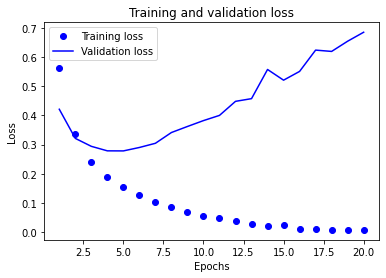

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

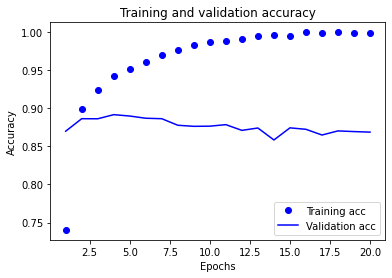

In [ ]:
plt.clf()                                      
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.5444 - accuracy: 0.7330
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.3158 - accuracy: 0.9014
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2259 - accuracy: 0.9230
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3015 - accuracy: 0.8797


In [ ]:
results

[0.3015143871307373, 0.8797199726104736]

In [ ]:
model.predict(x_test)

array([[0.18911257],
       [0.9941741 ],
       [0.4124529 ],
       ...,
       [0.12155858],
       [0.05944681],
       [0.39287525]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid

model = Sequential()
model.add(Dense(32, activation=relu, input_shape=(10000,)))
model.add(Dense(32, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 48ms/step - loss: 0.4952 - accuracy: 0.7851 - val_loss: 0.3492 - val_accuracy: 0.8799
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2759 - accuracy: 0.9041 - val_loss: 0.2845 - val_accuracy: 0.8936
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2008 - accuracy: 0.9298 - val_loss: 0.2818 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1545 - accuracy: 0.9469 - val_loss: 0.2830 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1244 - accuracy: 0.9578 - val_loss: 0.2944 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1013 - accuracy: 0.9664 - val_loss: 0.3756 - val_accuracy: 0.8655
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0785 - accuracy: 0.9751 - val_loss: 0.3415 - val_accuracy: 0.8827
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

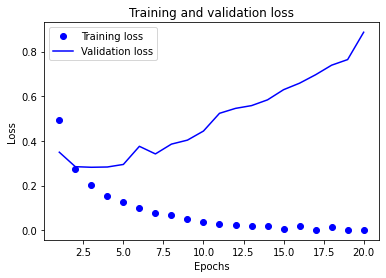

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

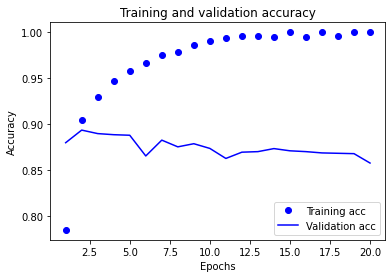

In [ ]:
plt.clf()                                      
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 32 Neurons at each layer and RMSPROP optimizer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10000,)))
#model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation=sigmoid))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 47ms/step - loss: 0.4737 - accuracy: 0.8005 - val_loss: 0.3881 - val_accuracy: 0.8471
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2900 - accuracy: 0.9061 - val_loss: 0.3670 - val_accuracy: 0.8440
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2204 - accuracy: 0.9303 - val_loss: 0.2812 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1786 - accuracy: 0.9438 - val_loss: 0.2734 - val_accuracy: 0.8924
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1488 - accuracy: 0.9542 - val_loss: 0.2778 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1251 - accuracy: 0.9632 - val_loss: 0.2867 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1076 - accuracy: 0.9683 - val_loss: 0.2979 - val_accuracy: 0.8853
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

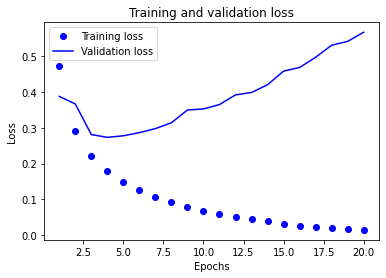

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

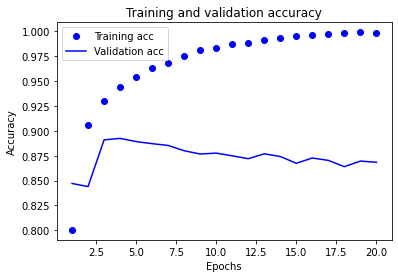

In [ ]:
plt.clf()                                      
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 32 Neurons at each layer and  Adam Optimizer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10000,)))
#model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation=sigmoid))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.4945 - accuracy: 0.8023 - val_loss: 0.3599 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2769 - accuracy: 0.9094 - val_loss: 0.2974 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2073 - accuracy: 0.9333 - val_loss: 0.2809 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1668 - accuracy: 0.9505 - val_loss: 0.2766 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1367 - accuracy: 0.9615 - val_loss: 0.2820 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1137 - accuracy: 0.9711 - val_loss: 0.2901 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0949 - accuracy: 0.9783 - val_loss: 0.3014 - val_accuracy: 0.8828
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

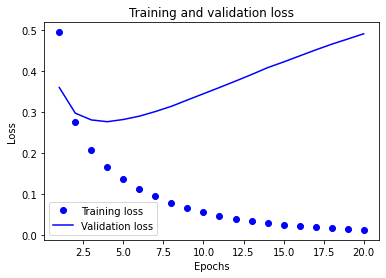

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

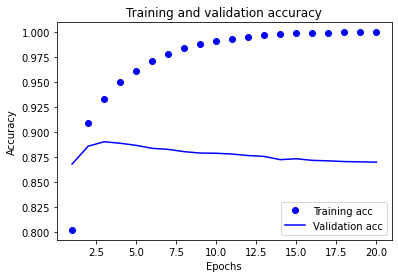

In [ ]:
plt.clf()                                      
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()